In [1]:
import numpy as np
import cv2 # opencv-python which is an Open Source Computer Vision Library
import sys
import matplotlib.pyplot as plt # matplotlib.pyplot which provides a MATLAB-like plotting framework

def close_window():
    cv2.destroyAllWindows()  # Close the window
    cv2.waitKey(1)
    cv2.waitKey(1)
    
def ifNotExistExit(filename):
    if not filename:
        print('filename is None')
        sys.exit()

img = cv2.imread('./fig/dog.bmp', cv2.IMREAD_GRAYSCALE)

if img is None:
	ifNotExistExit(img)

print(type(img)) # class numpy
print(img.shape) # bgr (rgb x)
print(img.dtype)

h, w = img.shape
print(f'height: {h}, width: {w}')

cv2.namedWindow('img', cv2.WINDOW_AUTOSIZE) # create a window with the name 'img' and set the window size to fit the image

cv2.imshow('img', img)
while True:
    if cv2.waitKey(1000) & 0xFF == ord('q'):  # Press 'q' to close the window
        break

cv2.waitKey() # wait for any key to close the window 
close_window()

<class 'numpy.ndarray'>
(480, 640)
uint8
height: 480, width: 640


2025-03-20 22:11:51.657 python[73075:8588739] +[IMKClient subclass]: chose IMKClient_Modern
2025-03-20 22:11:51.657 python[73075:8588739] +[IMKInputSession subclass]: chose IMKInputSession_Modern


In [6]:
## url image usage
from urllib import request

url = 'https://www.google.com/images/branding/googlelogo/1x/googlelogo_color_272x92dp.png'
req = request.urlopen(url)
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
img = cv2.imdecode(arr, cv2.IMREAD_COLOR)

cv2.imwrite('./fig/google.png', img)

cv2.imshow('img', img)
cv2.waitKey()
close_window()

## Canvas

In [11]:
img1 = np.ones((200, 200, 3), np.uint8) * 255   # whtie canvas
img2 = np.zeros((200, 200, 3), np.uint8)        # black canvas

cv2.imshow("White Canvas", img1)
cv2.imshow("Black Canvas", img2)

cv2.waitKey()
close_window()

### Draw Line

In [19]:
## draw line on the image on the canvas

white_bg_img = np.ones((600, 1200, 3), np.uint8) * 255 # white canvas

# draw a red line on the white canvas
cv2.line(white_bg_img, (50, 100), (300, 100), (0, 0, 255), 3, cv2.LINE_AA)
# draw a green line on the white canvas
cv2.line(white_bg_img, (300, 100), (250, 400), (0, 255, 0), 3, cv2.LINE_AA)

# draw a blue arrowed line on the white canvas
cv2.arrowedLine(white_bg_img, (250, 400), (400, 400), (255, 0, 0), 3, cv2.LINE_AA)

# draw a yellow rectangle on the white canvas
cv2.rectangle(white_bg_img, (500, 100), (800, 400), (0, 255, 255), 3, cv2.LINE_AA)

# draw a cyan filled rectangle on the white canvas
cv2.rectangle(white_bg_img, (900, 100), (1100, 400), (255, 255, 0), -1, cv2.LINE_AA)

# draw a magenta circle on the white canvas
cv2.circle(white_bg_img, (150, 500), 50, (255, 0, 255), 3, cv2.LINE_AA)

# draw a green filled circle on the white canvas
cv2.circle(white_bg_img, (350, 500), 50, (0, 255, 0), -1, cv2.LINE_AA)

# draw a blue ellipse on the white canvas
cv2.ellipse(white_bg_img, (600, 500), (100, 50), 0, 0, 360, (255, 0, 0), 3, cv2.LINE_AA)


# show the white canvas
cv2.imshow('white_bg_img', white_bg_img)



while True:
    if cv2.waitKey(1000) & 0xFF == ord('q'):  # Press 'q' to close the window
        break

cv2.waitKey()  # wait for any key to close the window
close_window() # close the window


## Alpha Channel which is the transparency of the color is not supported in this task.

In [2]:
## 알파채널

img_hat = cv2.imread('./fig/hat_alpha.png', cv2.IMREAD_UNCHANGED) # IMREAD_UNCHANGED flag to read the image with the alpha channel

# Check if the image was loaded successfully
if img_hat is None:
    print("Error: Image not found or unable to load.")
else:
    # Extract the alpha channel and RGB channels
    hat_mst = img_hat[:, :, 3]  # alpha channel
    hat_rgb = img_hat[:, :, :3]  # rgb channel

    # Display the images
    cv2.imshow('img_hat', img_hat)
    cv2.imshow('hat_mst', hat_mst)
    cv2.imshow('hat_rgb', hat_rgb)
    cv2.waitKey()
    close_window()


libpng warning: iCCP: known incorrect sRGB profile


## 모든 이미지는 Histogram (히스토그램)을 이용하여 그림을 그린다.
히스토그램에서 X축과 Y축의 의미는 다음과 같습니다: 
[ref 2503_KOSA_OpenCV_5d.pdf 13page](2503_KOSA_OpenCV_5d.pdf)

축	의미
X축 (가로축)	***픽셀의 밝기(명암) 값***을 나타냄. 일반적으로 0(완전한 검정)부터 255(완전한 흰색)까지의 그레이스케일 값을 가짐.
Y축 (세로축)	해당 밝기 값(명암 값)을 가진 **픽셀의 개수(빈도)**를 나타냄. 즉, 특정 밝기를 가지는 픽셀이 이미지 내에서 얼마나 많이 존재하는지를 보여줌.


해석 방법
히스토그램의 왼쪽 영역: 어두운 픽셀(검정에 가까운 부분)이 많을수록 높아짐.
히스토그램의 오른쪽 영역: 밝은 픽셀(흰색에 가까운 부분)이 많을수록 높아짐.
히스토그램이 균등하게 분포되어 있다면, 이미지의 **명암 대비(contrast)**가 좋은 상태임.
특정 부분에 몰려 있다면, 이미지가 너무 어둡거나 밝은 상태일 수 있음.
주어진 이미지에서는 왼쪽(어두운 영역)과 오른쪽(밝은 영역)에서 픽셀 수가 많이 나타나므로 명암 대비가 뚜렷한 이미지로 보입니다.

### 형상의 화소처리

In [9]:
## 영상의 화소처리

src = cv2.imread('./fig/lenna.png', cv2.IMREAD_GRAYSCALE) # default value is cv2.IMREAD_COLOR
src2 = np.zeros_like(src) # create a black image with the same size as the source image

print(src.shape) # (height, width, channel)
print(src.dtype) # uint8

print(src2.shape) # (height, width, channel)
print(src2.dtype) # uint8

#gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY) # convert the color image to grayscale image

dst = cv2.add(src, 50) # add 50 to all pixels, if the pixel value is greater than 255, it will be set to 255 (not over maximum value)
dst_add_red = cv2.add(src, (50, 0, 0, 0)) # add 50 to the red channel only
dst_add_green = cv2.add(src, (0, 50, 0, 0)) # add 50 to the green channel only
dst_add_blue = cv2.add(src, (0, 0, 50, 0)) # add 50 to the blue channel only


#dst2 = cv2.subtract(src, 50) # subtract 50 from all pixels, if the pixel value is less than 0, it will be set to 0 (not below minimum value)

cv2.circle(src2, (110,110), 80, 200, -1) # draw a filled circle on the black image
cv2.circle(src2, (110,110), 40, 50, -1) # draw a filled circle on the black image

dst1 = cv2.add(src, src2) # add two images
dst2 = cv2.addWeighted(src, 0.5, src2, 0.5, 0) # add two images with the same weight
dst3 = cv2.subtract(src, src2) # subtract two images
dst4 = cv2.absdiff(src, src2) # get the absolute difference between two images
dst5 = cv2.bitwise_and(src, src2) # bitwise AND operation between two images
dst6 = cv2.bitwise_or(src, src2) # bitwise OR operation between two images
dst7 = cv2.bitwise_xor(src, src2) # bitwise XOR operation between two images
dst8 = cv2.bitwise_not(src) # bitwise NOT operation on the source image
dst9 = cv2.divide(src, src2) # divide two images
dst10 = cv2.multiply(src, src2) # multiply two images

cv2.imshow('add', dst1)
cv2.imshow('addWeighted', dst2)
cv2.imshow('subtract', dst3)
cv2.imshow('absdiff', dst4)
cv2.imshow('bitwise_and', dst5)
cv2.imshow('bitwise_or', dst6)
cv2.imshow('bitwise_xor', dst7)
cv2.imshow('bitwise_not', dst8)
cv2.imshow('divide', dst9)
cv2.imshow('multiply', dst10)

cv2.imshow('src', src)
cv2.imshow('dst', dst)

cv2.imshow('dst_add_red', dst_add_red)
cv2.imshow('dst_add_green', dst_add_green)
cv2.imshow('dst_add_blue', dst_add_blue)

cv2.imshow('src2', src2)

#cv2.imshow('dst2', dst2)

#cv2.imshow('gray', gray)

cv2.waitKey()
close_window()


(220, 220)
uint8
(220, 220)
uint8


In [13]:
src = cv2.imread("./fig/rose.jpg", cv2.IMREAD_COLOR)
background = np.ones_like(src)*255

weight = np.arange(0, 1, 0.01)
# print(weight)

for i in weight:
    dst = cv2.addWeighted(src, i, background, 1-i, 0.0)
    cv2.imshow('dst', dst)

    if cv2.waitKey(100) == 27:
        break

cv2.waitKey()
close_window()

## Color channel (채널)을 분리 및 결합하여 이미지를 처리한다.
## 색상을 다루는 방법은 다음과 같습니다:
- **색상을 다루는 방법**
  - **색상을 다루는 방법은 이미지의 색상을 분리하거나 결합하는 방법을 의미함.**
  - **색상을 분리하면 이미지의 색상을 각각의 채널로 분리하여 처리할 수 있음.**
  - **색상을 결합하면 이미지의 색상을 각각의 채널로부터 결합하여 원본 이미지로 복원할 수 있음.**
  - **색상을 분리하거나 결합하는 방법은 OpenCV의 split() 및 merge() 함수를 사용하여 처리할 수 있음.**

In [17]:
### 
src = cv2.imread("./fig/field.bmp")

if src is None:
    print('image read failed')
    sys.exit()

b, g, r = cv2.split(src)   # split the image into three channels
dst = cv2.merge((r, g, b)) # change the order of the channels

cv2.namedWindow("rose", cv2.WINDOW_NORMAL)
cv2.imshow("rose", src)
cv2.imshow("rgb", dst)
cv2.imshow("b", b)
cv2.imshow("g", g)
cv2.imshow("r", r)


cv2.waitKey()
close_window()

## 영상 히스토그램 처리
- **히스토그램 평활화**
  - **히스토그램 평활화는 이미지의 명암 대비를 향상시키는 방법을 의미함.**
  - **히스토그램 평활화는 이미지의 히스토그램을 균일하게 분포시켜 명암 대비를 향상시킴.**
  - **히스토그램 평활화는 OpenCV의 equalizeHist() 함수를 사용하여 처리할 수 있음.**

hist_b: (256, 1), hist_g: (256, 1), hist_r: (256, 1)
[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   1.
    1.   1.   2.   0.   3.   6.   9.  13.  28.  43.  55.  80.  96. 137.
  185. 232. 300. 341. 426. 472. 517. 619. 609. 664. 606. 599. 525. 510.
  459. 475. 497. 510. 560. 581. 631. 639. 621. 578. 585. 552. 533. 512.
  504. 509. 518. 508. 557. 492. 540. 581. 521. 592. 575. 634. 601. 553.
  563. 519. 526. 514. 462. 450. 471. 460. 509. 486. 521. 538. 503. 518.
  514. 460. 484. 503. 486. 493. 514. 536. 610. 611. 626. 614. 610. 533.
  510. 427. 397. 370. 321. 285. 215. 189. 197. 151. 165. 163. 169. 154.
  155. 155. 163. 142. 152. 148. 157. 156. 162. 138. 150. 166. 144. 172.
  159. 197. 201. 209. 171. 170. 170. 167. 186. 160. 163. 155. 149. 162.
  128. 145. 132. 126. 148. 136. 114. 107.  93.  97.  85.  96.  98.  88.
  128. 111.

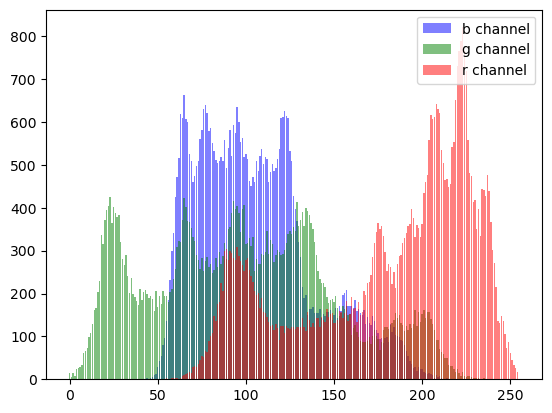

In [23]:
#
src = cv2.imread("./fig/lenna.png", cv2.IMREAD_COLOR)

if src is None:
    print("Image read failed")
    sys.exit()

hist_b = cv2.calcHist([src], [0], None, [256], [0, 256]) # calculate the histogram of the blue channel
hist_g = cv2.calcHist([src], [1], None, [256], [0, 255]) # calculate the histogram of the green channel
hist_r = cv2.calcHist([src], [2], None, [256], [0, 255]) # calculate the histogram of the red channel

# print the histogram values
print(f'hist_b: {hist_b.shape}, hist_g: {hist_g.shape}, hist_r: {hist_r.shape}') # (256, 1)
print(hist_b.T) # (1, 256), it means the histogram is a row vector
print(hist_g.T) # (1, 256)
print(hist_r.T) # (1, 256)


# colors = ['b', 'g', 'r']
# bgr_planes = cv2.split(src)

# for (p, c) in zip(bgr_planes, colors):
#     hist = cv2.calcHist([p], [0], None, [256], [0, 256])
#     plt.plot(hist, color=c)

# plt.plot(hist_b, color = "b")
# plt.plot(hist_g, color = "g")
# plt.plot(hist_r, color = "r")
# plt.show()

plt.bar(np.arange(len(hist_b)), hist_b[:,0], color = "b", label = 'b channel', alpha = 0.5) 
plt.bar(np.arange(len(hist_g)), hist_g[:,0], color = "g", label = 'g channel', alpha = 0.5)
plt.bar(np.arange(len(hist_r)), hist_r[:,0], color = "r", label = 'r channel', alpha = 0.5)
plt.legend(loc='upper right')
plt.show()

cv2.imshow("lenna", src)
cv2.waitKey()
close_window()

## Histogram Equalization
- **히스토그램 평활화는 이미지의 명암 대비를 향상시키는 방법을 의미함.**
- **히스토그램 평활화는 이미지의 히스토그램을 균일하게 분포시켜 명암 대비를 향상시킴.**
- **히스토그램 평활화는 OpenCV의 equalizeHist() 함수를 사용하여 처리할 수 있음.**

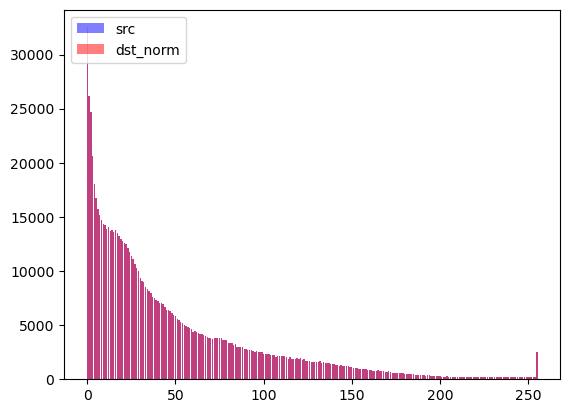

In [30]:
src = cv2.imread('fig/manjang.jpg')
if src is None:
    print('Image load failed!')
    sys.exit()

# minMaxLoc(src[, mask]) -> minVal, maxVal, minLoc, maxLoc
# smin, smax, _, _ = cv2.minMaxLoc(src)

dst_norm = cv2.normalize(src, None, 0, 255, cv2.NORM_MINMAX, -1) # normalize the image to 0-255, -1 means the same type as the source image
# dst = np.clip(255*(src-smin)/(smax-smin) + 0, 0, 255).astype(np.uint8)

cv2.imshow('src', src)
cv2.imshow('dst_norm', dst_norm)

# src 를 plt.bar로 표현
# dst_norm 를 plt.bar로 표현
hist = cv2.calcHist([src], [0], None, [256], [0, 256])
dst_norm_hist = cv2.calcHist([dst_norm], [0], None, [256], [0, 256])

plt.bar(np.arange(len(hist)), hist[:,0], color = "b", label = 'src', alpha = 0.5)
plt.bar(np.arange(len(dst_norm_hist)), dst_norm_hist[:,0], color = "r", label = 'dst_norm', alpha = 0.5)
plt.legend(loc='upper left')
plt.show()

cv2.waitKey()
close_window()

## Directory 내 영상읽기
- **특정 디렉토리 내의 이미지 파일을 읽어들여 처리하는 방법을 의미함.**
- **특정 디렉토리 내의 이미지 파일을 읽어들이기 위해서는 OpenCV의 imread() 함수를 사용하여 처리할 수 있음.**

In [ ]:
import os
import cv2

image_folder = './fig/images'

# Create the directory if it does not exist
if not os.path.exists(image_folder):
    os.makedirs(image_folder)
else:
    print('images folder already exists')

# Debug: Print the absolute path of the image folder
print(f'Absolute path of image folder: {os.path.abspath(image_folder)}')

# Debug: List all files in the directory
list_files = os.listdir(image_folder)
print(f'list_files: {list_files}')

# List the image files in the directory
image_files = [f for f in os.listdir(image_folder) if f.endswith(('.png', '.jpg', '.jpeg', '.bmp'))]
print(f'image_files: {image_files}')

cv2.namedWindow('Scene', cv2.WINDOW_NORMAL)
cv2.setWindowProperty('Scene', cv2.WND_PROP_FULLSCREEN, cv2.WINDOW_FULLSCREEN)

if image_files:
    idx = 0
    while True:
        img = cv2.imread(os.path.join(image_folder, image_files[idx]))
        cv2.imshow('Scene', img)

        if cv2.waitKey(1000) & 0xFF == 27: # Press 'ESC' to close the window
            break

        idx += 1

        if idx >= len(image_files):
            idx = 0

    cv2.waitKey()  # wait for any key, 'q' to close the window
    close_window() # close the window
else:
    print("No image files found in the directory.")

images folder already exists
Absolute path of image folder: /Users/joshuapark/Desktop/AI_Master_Lec/1_cv/fig/images
list_files: ['boat_mountains_lake_135258_1920x1080.jpg', 'forest_fog_trees_128751_1920x1080.jpg', 'pier_dock_sea_dusk_shore_118549_1920x1080.jpg', 'autumn_forest_park_128379_1920x1080.jpg', 'road_marking_evening_clouds_horizon_120298_1920x1080.jpg']
image_files: ['boat_mountains_lake_135258_1920x1080.jpg', 'forest_fog_trees_128751_1920x1080.jpg', 'pier_dock_sea_dusk_shore_118549_1920x1080.jpg', 'autumn_forest_park_128379_1920x1080.jpg', 'road_marking_evening_clouds_horizon_120298_1920x1080.jpg']


: 